### In this notebook I compile a dataset of the top 30 ASX companies and do a time series plot as well as  look for  correlation acrross the stocks.

In [107]:
#df_all_ASX.to_csv('ASX30.csv')

top 30 companies by market capitalisation.

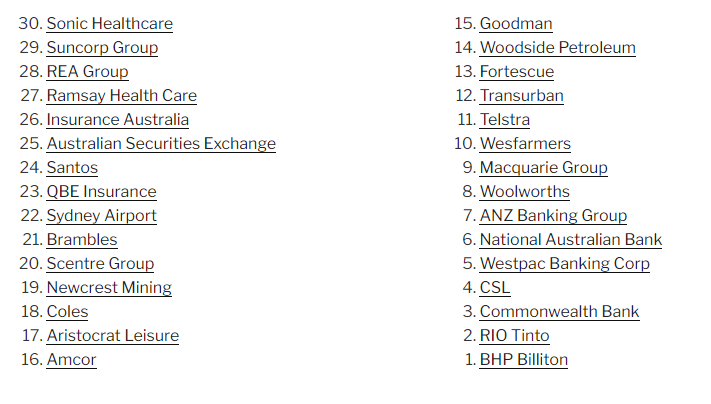

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [81]:
# compile dataframe of top 30 stocks from yahoo finance csv files.
# stock Closing value i.e column [4] is of interest.

list_of_files =['BHP.AX.csv', 'CBA.AX.csv','RIO.AX.csv','SHL.AX.csv','SUN.AX.csv','REA.AX.csv','RHC.AX.csv','IAG.AX.csv','ASX.AX.csv','STO.AX.csv','QBE.AX.csv', 'SYD.AX.csv','BXB.AX.csv','SCG.AX.csv','NCM.AX.csv','COL.AX.csv' ,'ALL.AX.csv', 'AMC.AX.csv', 'GMG.AX.csv', 'WPL.AX.csv', 'FMG.AX.csv', 'TCL.AX.csv', 'TLS.AX.csv', 'WES.AX.csv', 'MQG.AX.csv','WOW.AX.csv','ANZ.AX.csv', 'NAB.AX.csv','WBC.AX.csv', 'CSL.AX.csv']

df_ASX = []

for file in list_of_files:
    df = pd.read_csv(file, usecols =[0,4], index_col = "Date")
    df = df.add_suffix(f'_{file}')
    df_ASX.append(df)
    
df_all_ASX = pd.concat(df_ASX, axis = 1)

# remove .csv 

df_all_ASX.columns = df_all_ASX.columns.str.replace('.AX.csv','')


<ipython-input-81-f174fb6d60a6>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all_ASX.columns = df_all_ASX.columns.str.replace('.AX.csv','')


In [82]:
df_all_ASX

,Close_BHP,Close_CBA,Close_RIO,Close_SHL,Close_SUN,Close_REA,Close_RHC,Close_IAG,Close_ASX,Close_STO,...,Close_FMG,Close_TCL,Close_TLS,Close_WES,Close_MQG,Close_WOW,Close_ANZ,Close_NAB,Close_WBC,Close_CSL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,40.255737,54.574314,74.919998,15.210000,8.918640,9.750000,11.240000,4.180327,34.526417,12.445209,...,4.490000,5.294630,3.450,22.922783,47.204597,27.847349,22.889999,26.065140,25.128922,32.500000
2010-01-05,40.442627,55.399841,76.349998,15.250000,9.052523,9.760000,11.030000,4.149590,34.959595,12.628099,...,4.600000,5.399948,3.440,23.223433,48.119186,27.679056,23.000000,26.398088,25.337502,32.119999
2010-01-06,40.947224,55.678333,78.580002,15.040000,8.856848,9.800000,11.180000,4.200819,34.703625,12.723898,...,5.200000,5.294630,3.380,22.878784,48.394547,27.629559,22.660000,25.884398,25.218313,31.799999
2010-01-07,40.900501,55.141243,79.000000,14.850000,8.980432,9.850000,11.140000,4.159836,34.024323,12.575844,...,5.170000,5.313779,3.320,22.512136,47.686478,27.570162,22.120001,25.675116,24.880611,32.049999
2010-01-08,40.760338,55.857365,79.010002,14.770000,9.031925,9.700000,11.070000,4.211065,34.762695,12.445209,...,5.060000,5.313779,3.380,23.069441,48.089684,27.807751,22.250000,25.589499,24.979937,32.110001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-05,48.230000,86.449997,117.680000,31.320000,10.110000,135.889999,64.230003,4.820000,68.800003,7.760000,...,22.100000,12.540000,3.100,49.529999,144.199997,38.950001,28.840000,26.389999,24.870001,248.580002
2021-03-08,49.380001,87.320000,121.110001,31.030001,10.230000,134.919998,63.380001,4.810000,69.730003,7.550000,...,22.209999,12.420000,3.120,49.279999,148.449997,39.160000,28.719999,26.430000,24.740000,246.000000
2021-03-09,48.990002,87.889999,121.209999,30.700001,10.530000,133.300003,63.490002,4.620000,69.180000,7.410000,...,22.180000,12.700000,3.100,49.880001,152.050003,39.220001,29.100000,26.650000,24.920000,250.160004


In [86]:
# change index type to datetime

df_all_ASX['Date'] = df_all_ASX.index
df_all_ASX['Date'] = pd.to_datetime(df_all_ASX['Date'])
df_all_ASX.index = df_all_ASX['Date']
df_all_ASX.set_index('Date', inplace=True)
df_all_ASX.T

Date,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2021-02-26,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,2021-03-08,2021-03-09,2021-03-10,2021-03-11
Close_BHP,40.255737,40.442627,40.947224,40.900501,40.760338,41.554611,40.638859,40.293114,40.909847,40.788368,...,49.130001,50.090000,49.130001,50.869999,49.299999,48.230000,49.380001,48.990002,47.599998,46.869999
Close_CBA,54.574314,55.399841,55.678333,55.141243,55.857365,56.265156,56.265156,55.708172,56.483971,57.786911,...,81.559998,84.110001,84.489998,85.400002,86.379997,86.449997,87.320000,87.889999,86.720001,86.449997
Close_RIO,74.919998,76.349998,78.580002,79.000000,79.010002,80.000000,78.370003,77.120003,79.150002,78.620003,...,127.190002,127.699997,127.180000,129.750000,121.669998,117.680000,121.110001,121.209999,114.489998,116.195000
Close_SHL,15.210000,15.250000,15.040000,14.850000,14.770000,15.080000,14.680000,14.820000,14.710000,14.980000,...,31.730000,31.850000,31.760000,31.830000,31.420000,31.320000,31.030001,30.700001,30.549999,30.450001
Close_SUN,8.918640,9.052523,8.856848,8.980432,9.031925,9.124613,9.093717,8.959835,9.042224,9.021627,...,9.940000,10.100000,10.260000,10.200000,10.230000,10.110000,10.230000,10.530000,10.530000,10.500000
Close_REA,9.750000,9.760000,9.800000,9.850000,9.700000,9.750000,9.740000,9.790000,9.700000,9.600000,...,136.800003,139.330002,141.600006,142.559998,138.419998,135.889999,134.919998,133.300003,135.660004,135.639999
Close_RHC,11.240000,11.030000,11.180000,11.140000,11.070000,11.200000,11.450000,11.670000,11.800000,11.900000,...,66.000000,68.110001,67.430000,67.269997,64.900002,64.230003,63.380001,63.490002,63.480000,62.720001
Close_IAG,4.180327,4.149590,4.200819,4.159836,4.211065,4.211065,4.149590,4.108606,4.036885,4.026639,...,4.990000,4.960000,4.930000,4.880000,4.880000,4.820000,4.810000,4.620000,4.560000,4.530000
Close_ASX,34.526417,34.959595,34.703625,34.024323,34.762695,34.329517,34.162151,34.526417,34.270447,34.142460,...,67.599998,68.580002,68.500000,68.599998,67.199997,68.800003,69.730003,69.180000,68.989998,68.470001
Close_STO,12.445209,12.628099,12.723898,12.575844,12.445209,12.541008,12.558426,12.192647,12.149102,11.983630,...,7.230000,7.410000,7.280000,7.390000,7.410000,7.760000,7.550000,7.410000,7.130000,7.140000


In [98]:
df_all_ASX.describe().T


,count,mean,std,min,25%,50%,75%,max
Close_BHP,2829.0,32.271809,6.584549,14.200000,28.341608,33.219395,36.450001,50.869999
Close_CBA,2829.0,69.941191,12.461392,42.698658,57.776962,73.352577,79.830002,95.800949
Close_RIO,2829.0,70.929104,17.294638,37.029999,58.480000,66.650002,81.800003,130.000000
Close_SHL,2829.0,19.585557,6.462514,9.940000,13.440000,19.250000,23.469999,36.750000
Close_SUN,2829.0,11.914900,2.398884,6.632337,9.200000,12.873326,13.892893,16.168898
Close_REA,2829.0,53.116055,34.994711,8.730000,17.200001,48.389999,76.440002,162.000000
Close_RHC,2829.0,48.703125,21.277548,11.030000,24.459999,57.279999,66.279999,83.660004
Close_IAG,2829.0,5.663626,1.475204,2.858606,4.538934,5.809426,6.547131,8.862704
Close_ASX,2829.0,48.102146,17.924987,26.729176,34.762695,41.029999,59.220001,90.510002
Close_STO,2829.0,8.142682,3.254083,2.480000,5.147038,7.272043,11.391416,14.361196


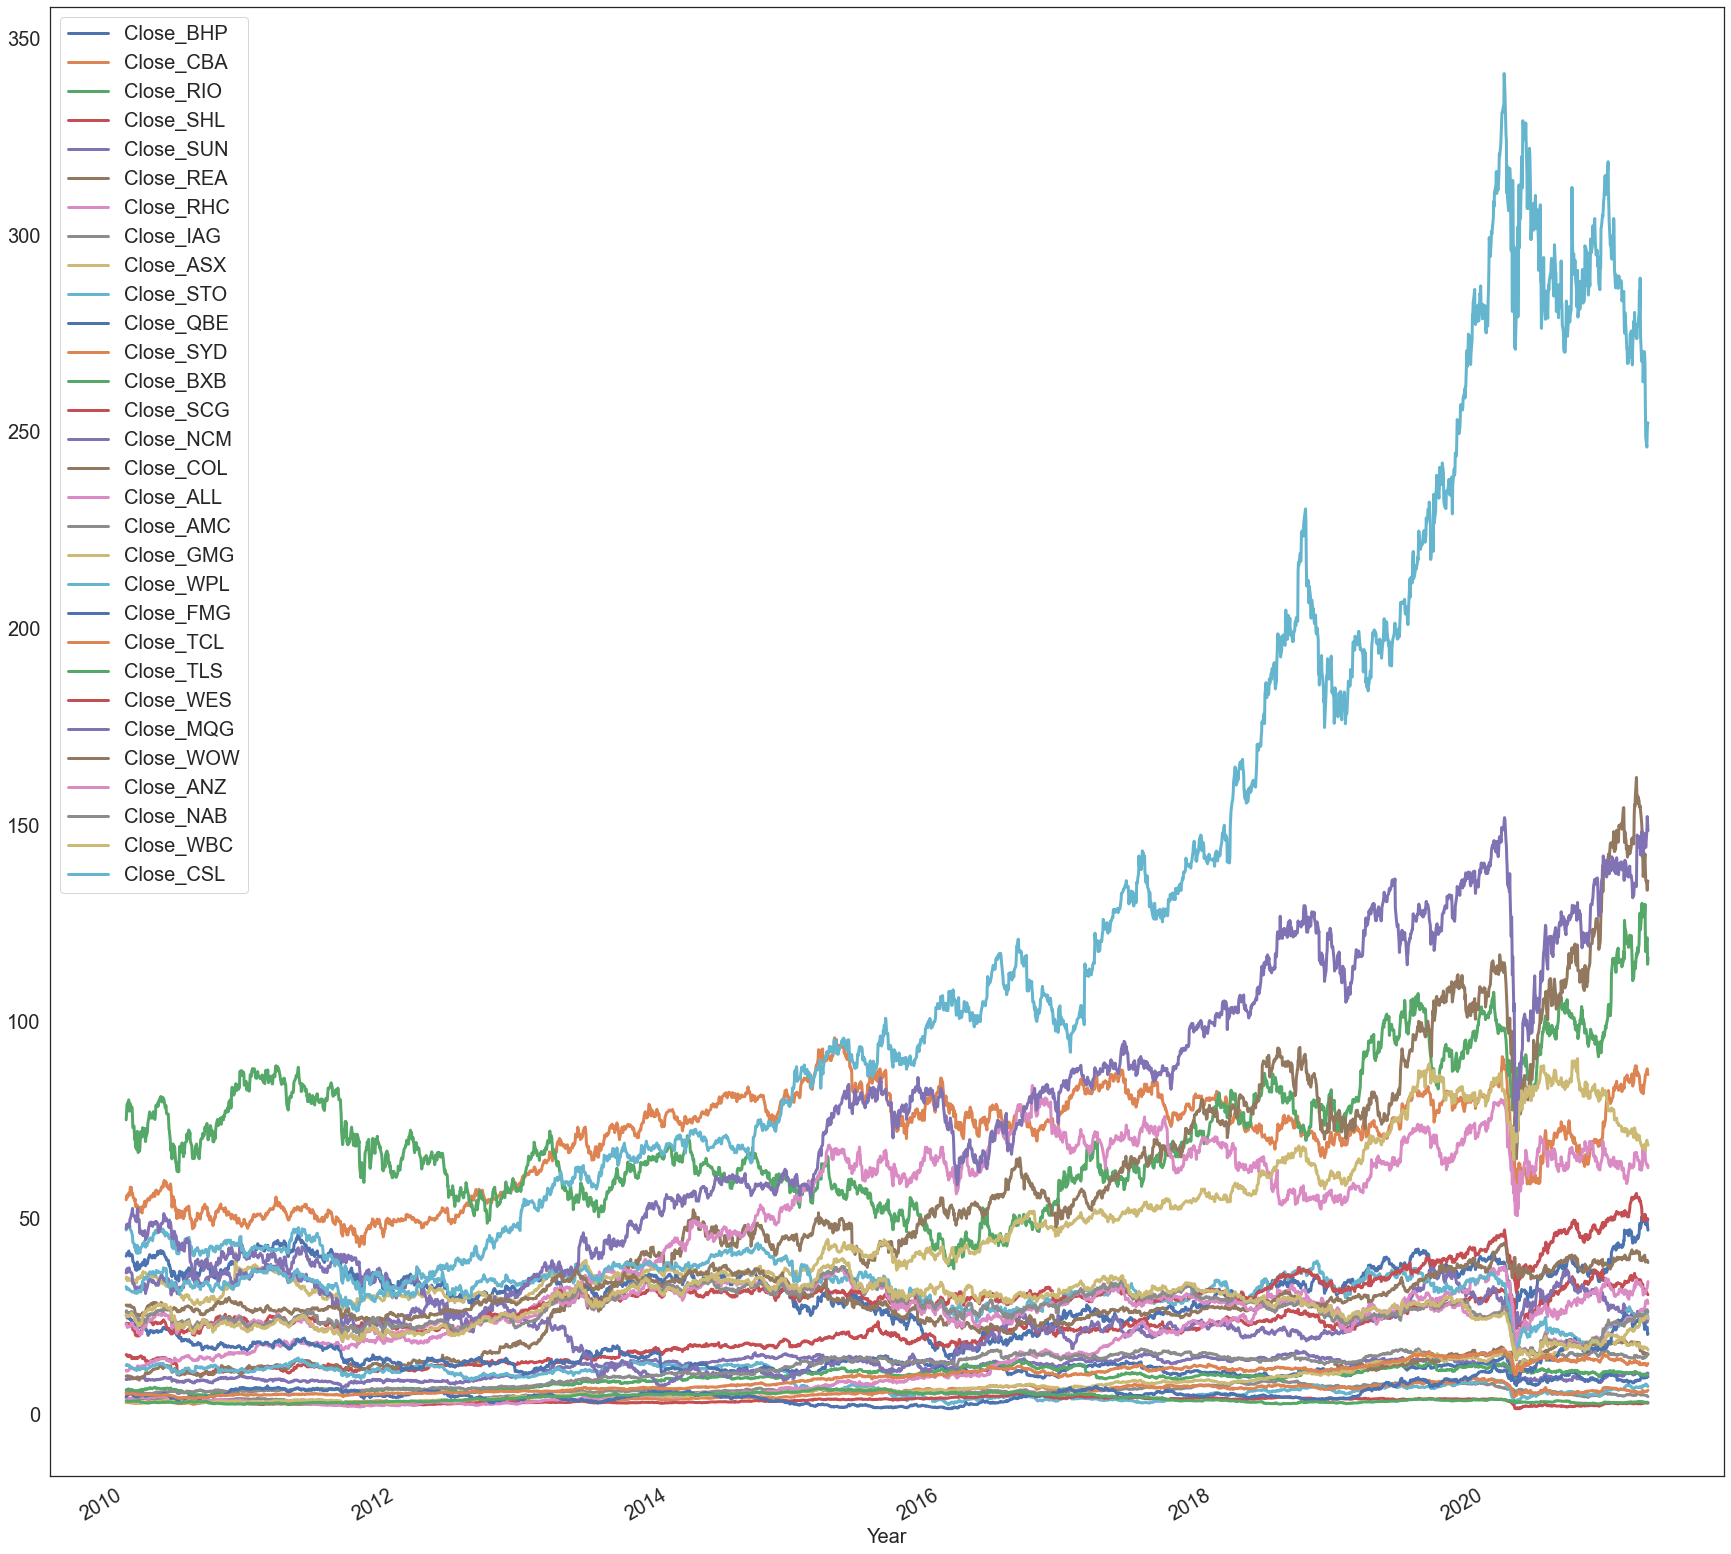

In [105]:
df_all_ASX.plot(figsize=(30,30), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(fontsize = 20)

<AxesSubplot:>

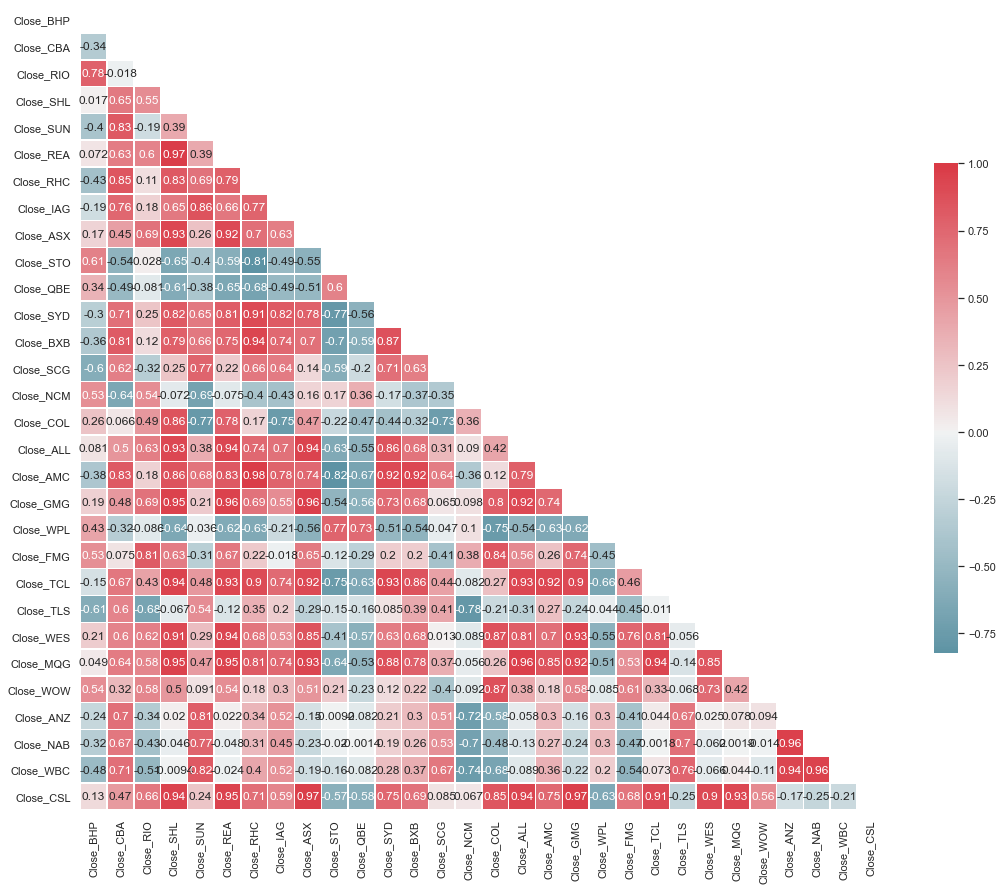

In [85]:
#Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_all_ASX.corr(), dtype= bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_all_ASX.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [108]:
#df_all_ASX.to_csv('ASX30.csv')